<h1>Predicting house prices in Ames, Iowa<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-and-import-data" data-toc-modified-id="Setup-and-import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and import data</a></span></li><li><span><a href="#Initial-cleaning-and-exploration" data-toc-modified-id="Initial-cleaning-and-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial cleaning and exploration</a></span><ul class="toc-item"><li><span><a href="#Explore-SalePrice" data-toc-modified-id="Explore-SalePrice-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore <code>SalePrice</code></a></span></li><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing data</a></span><ul class="toc-item"><li><span><a href="#Garage-variables" data-toc-modified-id="Garage-variables-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Garage variables</a></span></li><li><span><a href="#Basement-variables" data-toc-modified-id="Basement-variables-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Basement variables</a></span></li><li><span><a href="#Any-missing-values-left?" data-toc-modified-id="Any-missing-values-left?-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Any missing values left?</a></span></li></ul></li><li><span><a href="#More-variable-recoding" data-toc-modified-id="More-variable-recoding-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>More variable recoding</a></span><ul class="toc-item"><li><span><a href="#Ordinal-variables" data-toc-modified-id="Ordinal-variables-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Ordinal variables</a></span></li><li><span><a href="#Nominal-variables" data-toc-modified-id="Nominal-variables-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Nominal variables</a></span></li></ul></li></ul></li><li><span><a href="#Further-exploration" data-toc-modified-id="Further-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Further exploration</a></span><ul class="toc-item"><li><span><a href="#Property-area-variables" data-toc-modified-id="Property-area-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Property area variables</a></span></li><li><span><a href="#Property-quality-variables" data-toc-modified-id="Property-quality-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Property quality variables</a></span></li><li><span><a href="#Number-of-rooms-variables" data-toc-modified-id="Number-of-rooms-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Number of rooms variables</a></span></li><li><span><a href="#House-prices-over-time" data-toc-modified-id="House-prices-over-time-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>House prices over time</a></span></li></ul></li><li><span><a href="#Prepare-for-modelling" data-toc-modified-id="Prepare-for-modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prepare for modelling</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Drop-high-leverage-value-and-re-run" data-toc-modified-id="Drop-high-leverage-value-and-re-run-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Drop high leverage value and re-run</a></span><ul class="toc-item"><li><span><a href="#Cross-validate" data-toc-modified-id="Cross-validate-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Cross-validate</a></span></li></ul></li><li><span><a href="#Ordinary-next-steps" data-toc-modified-id="Ordinary-next-steps-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Ordinary next steps</a></span></li></ul></li><li><span><a href="#Random-Forest-regression" data-toc-modified-id="Random-Forest-regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random Forest regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cross-validate" data-toc-modified-id="Cross-validate-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Cross-validate</a></span></li></ul></li></ul></li><li><span><a href="#Prepare-test-data" data-toc-modified-id="Prepare-test-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Prepare test data</a></span></li><li><span><a href="#Make-predictions" data-toc-modified-id="Make-predictions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Make predictions</a></span></li></ul></div>

**Goal is to predict SalesPrice as a function of other explanatory variables, minimising root mean square error (RMSE) on test data.**

* Explore data, check scales, distributions, missing data, etc.
* Recode variables for use in models. Create new variables based on exploratory findings?
* Many variables, explore opportunities for dimension reduction and patterns at higher dimensions.
* Fit simple regression model first and get prediction performance.
* Then try more complex methods, e.g. Random Forest
-----------------

## Setup and import data

`data/data_description.txt` shows:
* `MSSubClass` coded numerically but is categorical.
* Variables pertaining to basement show 'No basement' as `NA`. Create has_basement var.
* Variables pertaining to garage show 'No garage' as `NA`. Create has_garage var.
* Several variables describing square footage of parts of the house. Sum to calculate total area?
* Create date_sold from `YrSold`and `MoSold`.
* `Bedroom` doesn't include basement bedrooms.
* `TotRmsAbvGrd` doesn't include bathrooms or any basement rooms.
* `Fence` seems to represent two variables, privacy and wood/wire. Probably avoid using this.

* Several ordinal variables need recoding:
    * `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `KitchenQual`, `FireplaceQu`, `GarageQual`, `GarageCond` coded as `"Ex", "Gd", "TA", "Fa", "Po"`.
    * `PoolQC` coded as `"Ex", "Gd", "TA", "Fa"`.
    * `BsmtExposure` coded as `"Gd", "Av", "Mn", "No"`.
    * `BsmtFinType1` and `BsmtFinType2` coded as `"GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf"`.
    * `OverallQual`, `OverallCond` are already numerically coded.
    * `CentralAir` coded as `Y/N`, convert to `1,0`.
    * `Functional` coded as `"Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal"`.
    * `GarageFinish` coded as `"Fin", "RFn", "Unf"`.
    * `PavedDrive` coded as `"Y", "P" "N"`.

* `NaN`s mean missing feature, which should be captured, e.g. as `"None"`.

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot
import statsmodels.formula.api as sm
import prince

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Test set doesn't contain SalePrice, so we'll want to either create a validation set from the training data or use crossvalidation to check the model's accuracy.

**Note:** We should check whether any of the explanatory variable we use and seem important to making predictions differ strongly between the train and test data. Wouldn't want to be making predictions out-of-sample, or we'd at least want to know about the problem.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


----------------------------

## Initial cleaning and exploration

### Explore `SalePrice`

First thing's first, let's take a look at our response variable.

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

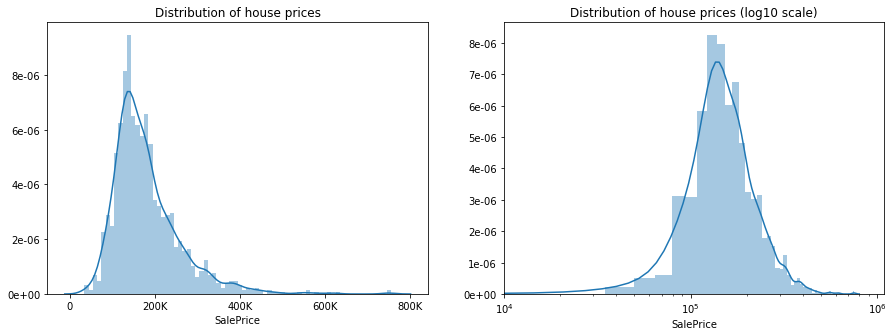

In [8]:
f,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.distplot(train['SalePrice'], hist=True, ax=ax1,
             bins = int((train['SalePrice'].max() - train['SalePrice'].min()) / 10000))
ax1.set_xticks([0, 2e5, 4e5, 6e5, 8e5])
ax1.set_xticklabels(['0', '200K', '400K', '600K', '800K'])
ax1.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0e'))
# ax1.xticks(list(range(0, 8e5, 1e5)), ['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K'])
ax1.set_title('Distribution of house prices')

sns.distplot(train['SalePrice'], hist=True, ax=ax2)
ax2.set_xscale(value='log')
ax2.set_xlim(left=1e4)
ax2.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0e'))
ax2.set_title('Distribution of house prices (log10 scale)')

plt.show()

House prices are approximately log-normally distributed. Work on log-scale from now on.

In [9]:
train['log_price'] = np.log10(train['SalePrice'])

In [10]:
train['log_price'].describe()

count    1460.000000
mean        5.221979
std         0.173480
min         4.542825
25%         5.113860
50%         5.212188
75%         5.330414
max         5.877947
Name: log_price, dtype: float64

### Missing data

In [11]:
n_nulls = train.isnull().sum()
n_nulls[n_nulls.values > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Only seven houses have a pool, so drop `PoolQC` and `PoolArea`.\
`MiscFeature` is mainly whether houses have a shed or not and this shows no clear effect on house prices (only 49 observations), so drop this too and `MiscVal` too.\
`Fence` seems to contain multiple pieces of information, about the fencing material and the level of privacy the fencing provides. This makes it quite a poor variable, and it's unlikely to hold much sway, so we'll drop it.

In [12]:
train.drop(columns=['PoolQC','PoolArea','MiscFeature','MiscVal','Fence'], inplace=True)

In [13]:
# train['MiscFeature'].value_counts()
# has_shed = train['MiscFeature'] == 'Shed'
# train.loc[train.index[has_shed],'SalePrice'].describe()
# train['Alley'].value_counts()
train.loc[train.index[np.logical_not(train['Alley'].isnull())],'log_price'].describe()

count    91.000000
mean      5.132965
std       0.145660
min       4.602060
25%       5.059759
50%       5.146128
75%       5.236032
max       5.424847
Name: log_price, dtype: float64

In [14]:
train.loc[train.index[train['Alley'].isnull()],'log_price'].describe()

count    1369.000000
mean        5.227896
std         0.173606
min         4.542825
25%         5.115611
50%         5.217484
75%         5.337459
max         5.877947
Name: log_price, dtype: float64

Some evidence that having an alley or not may affect average price (although not dramatically so). Reduce `Alley` variable to binary categorical.

In [15]:
train['has_alley'] = np.logical_not(train['Alley'].isnull())
train.drop(columns=['Alley'], inplace=True)

In [16]:
train['FireplaceQu'].fillna(value='NONE', inplace=True)
train['FireplaceQu'].value_counts()
# train[['FireplaceQu','SalePrice']].groupby(['FireplaceQu']).mean()

NONE    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [17]:
train['has_fireplace'] = train['Fireplaces'] > 0
# train['has_fireplace'].value_counts()
# fig,ax = plt.subplots()
# sns.boxplot(x='Fireplaces', y='SalePrice', data=train)
# plt.show()

Fireplace doesn't seem like an important feature in its own right, but it may act as a proxy for other features. There appears to be a difference in average price; number and quality of fireplaces have some association with sale price too, but the existence of at least one fireplace may capture enough of the information here.

`LotFrontage` is missing 259 observations, and is likely to be correlated with `LotArea` and other footage variables, so we might as well exclude `LotFrontage` from analysis rather than imputing values and introducing risk to our data quality..

In [18]:
train.drop(columns=['LotFrontage'], inplace=True)

The masonry veneer variables contain some truly missing data, i.e. not simply 'No masonry'. Only 8 observations, so we could omit these rows from our analysis if masonry veneer was highly explanatory. Boxplots show that there are some SalePrice differences among veener types, but sample sizes for some groups are low and it's not clear to me why veneer type alone would make a huge difference to house value. So it's simpler for now to ignore masonry veneer.

In [19]:
train.drop(columns=['MasVnrType','MasVnrArea'], inplace=True)

In [20]:
train.groupby(train['Electrical'] == "SBrkr")[['log_price']].describe()

log_price                                                    \
               count      mean       std       min       25%       50%   
Electrical                                                               
False          126.0  5.049952  0.150565  4.542825  4.968133  5.072617   
True          1334.0  5.238227  0.166591  4.578639  5.128964  5.230449   

                               
                75%       max  
Electrical                     
False       5.14473  5.378398  
True        5.34390  5.877947

Aggregating the rarer electrical types (fuse board types), there appears to be an average difference between fuse boards and circuit breakers, which may indicate the circuit breakers are a sign of newer electrical wiring. It's expensive to rewire a house, so makes sense that would affect sale price. Keep `has_circuit_breaker` in the analysis for now, but we can drop the extra detail in `Electrical`.

There's one missing value in `Electrical`, so we'll need to omit that row to keep using this variable.

In [21]:
train.drop(train[train['Electrical'].isnull()].index, inplace=True)

In [22]:
train['has_circuit_breaker'] = train['Electrical'].values == 'SBrkr'
# train.drop(columns=['Electrical'], inplace=True)

#### Garage variables

In [23]:
train['GarageType'].fillna(value='NONE', inplace=True)
train['GarageFinish'].fillna(value='NONE', inplace=True)
train['GarageQual'].fillna(value='NONE', inplace=True)
train['GarageCond'].fillna(value='NONE', inplace=True)
train['GarageArea'].fillna(value=0, inplace=True)
train['GarageCars'].fillna(value=0, inplace=True)
train.drop(columns=['GarageYrBlt'], inplace=True)

#### Basement variables

In [24]:
train['BsmtQual'].fillna(value='NONE', inplace=True)
train['BsmtCond'].fillna(value='NONE', inplace=True)
train['BsmtExposure'].fillna(value='NONE', inplace=True)
train['BsmtFinType1'].fillna(value='NONE', inplace=True)
train['BsmtFinType2'].fillna(value='NONE', inplace=True)

#### Any missing values left?

In [25]:
train.isna().sum().sort_values(ascending=False)

has_circuit_breaker    0
YearRemodAdd           0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
                      ..
TotRmsAbvGrd           0
Functional             0
Fireplaces             0
FireplaceQu            0
Id                     0
Length: 75, dtype: int64

### More variable recoding

In [26]:
# train.groupby('PavedDrive')[['SalePrice']].describe()
train['PavedDrive'] = train['PavedDrive'] == 'Y'
train['CentralAir'] = train['CentralAir'] == 'Y'

#### Ordinal variables

In [27]:
qual_map1 = {'NONE':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
qual_cols1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual', 
              'FireplaceQu', 'GarageQual', 'GarageCond', 'HeatingQC']
qual_map2 = {'NONE':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
qual_cols2 = ['BsmtFinType1', 'BsmtFinType2']
qual_map3 = {'NONE':0, 'Unf':1, 'RFn':2, 'Fin':3}
qual_cols3 = ['GarageFinish']

In [28]:
[train[c].replace(qual_map1, inplace=True) for c in qual_cols1]
[train[c].replace(qual_map2, inplace=True) for c in qual_cols2]
[train[c].replace(qual_map3, inplace=True) for c in qual_cols3]
# train.boxplot('SalePrice', 'BsmtFinType2')
train['bsmt_has_glq'] = train.apply(lambda row: row['BsmtFinType1'] == 6 or row['BsmtFinType2'] == 6, axis=1)

train[['bsmt_has_glq','log_price']].groupby(['bsmt_has_glq'], as_index=False).describe()

log_price                                                              \
      count      mean       std       min       25%       50%       75%   
0    1027.0  5.172801  0.155141  4.542825  5.080987  5.161368  5.258278   
1     432.0  5.338886  0.158491  4.877947  5.238046  5.329388  5.439333   

             
        max  
0  5.765619  
1  5.877947

No systematic trend within `BsmtExposure` so drop this.

In [29]:
train.rename(columns={'BsmtQual':'bsmt_height'}, inplace=True) # Rename to be more descriptive

#### Nominal variables

In [30]:
train['LotShape'] = train['LotShape'] == "Reg"
# train.boxplot('log_price', 'LotShape', figsize=(8,5))

In [31]:
train['in_culdesac'] = train['LotConfig'] == 'CulDSac'

Collapse neighbourhoods with fewer than 30 observations into an 'other' category.

In [32]:
nhood_counts = train['Neighborhood'].value_counts()
nhood_counts = dict(nhood_counts)
nhood_map = {k:(k if v > 30 else 'other') for k,v in nhood_counts.items()}
train['nhood2'] = train['Neighborhood'].replace(nhood_map)

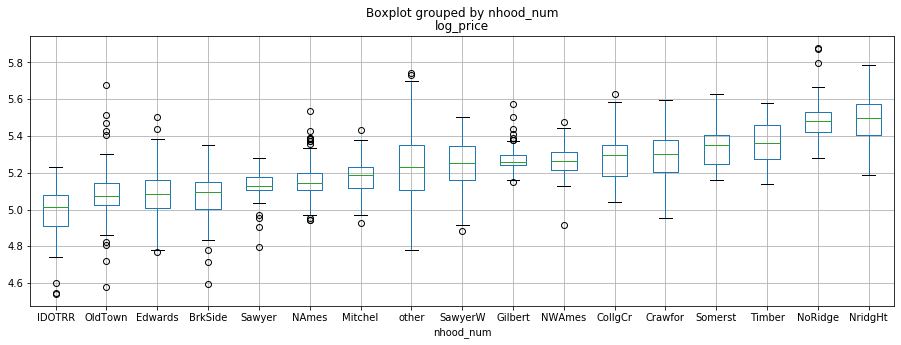

In [33]:
nhoods = train[['nhood2','log_price']].groupby(['nhood2']).median().sort_values('log_price').index.values
nhood_order = dict(zip(nhoods, range(1,len(nhoods)+1)))
train['nhood_num'] = train['nhood2'].replace(nhood_order)

f,ax = plt.subplots(figsize=(15,5))
train.boxplot('log_price', 'nhood_num', ax=ax)
ax.set_xticklabels(nhood_order.keys())
plt.show()

Variables `Condition1` and `Condition2` describe proximity to various features that might be best separated out.

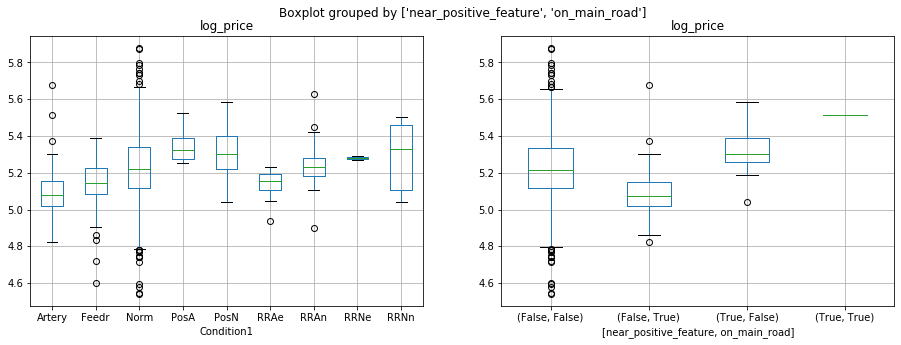

In [34]:
train['near_positive_feature'] = train.apply(lambda r: 'Pos' in r['Condition1'] or 'Pos' in r['Condition2'], axis=1)
train['on_main_road'] = train.apply(lambda r: r['Condition1'] == 'Artery' or r['Condition2'] == 'Artery', axis=1)
train['on_feeder'] = train.apply(lambda r: r['Condition1'] == 'Feedr' or r['Condition2'] == 'Feedr', axis=1)
# train['next_to_railway'] = train.apply(lambda r: 'RRA' in r['Condition1'] or 'RRA' in r['Condition2'], axis=1)

f,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5))
train.boxplot('log_price', 'Condition1', ax=ax1)
train.boxplot('log_price', ['near_positive_feature', 'on_main_road'], ax=ax2)
plt.show()

In [35]:
train['big_1fam'] = train.apply(lambda r: r['BldgType'] == '1Fam' and r['HouseStyle'] in ['2Story','2.5Fin'], axis=1)
train['small_1fam'] = train.apply(lambda r: r['BldgType'] == '1Fam' and r['HouseStyle'] in ['1Story','SFoyer','SLvl','1.5Unf','1.5Fin'], axis=1)

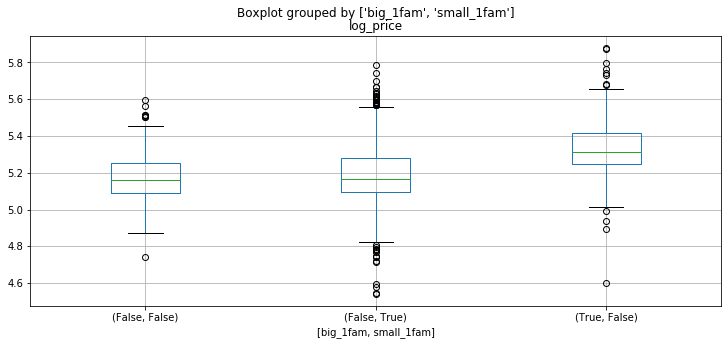

In [36]:
# train.loc[train['small_1fam'],'HouseStyle'].value_counts()
train.boxplot('log_price', ['big_1fam','small_1fam'], figsize=(12,5))

Large detached house variable shows more explanatory power than small detached houses. The other aspects of `BldgType` and `HouseStyle` are somewhat messy, so we'll just stick with `big_1fam`.

In [37]:
train['concrete_foundation'] = train['Foundation'] == 'PConc'

In [38]:
train['nontyp_fun'] = train['Functional'] != 'Typ'

In [39]:
train['has_garage'] = train['GarageType'] != 'NONE'
train['has_attchd_abvgrade_garage'] = train.apply(lambda r: r['GarageType'] in ['Attchd','BuiltIn'], axis=1)

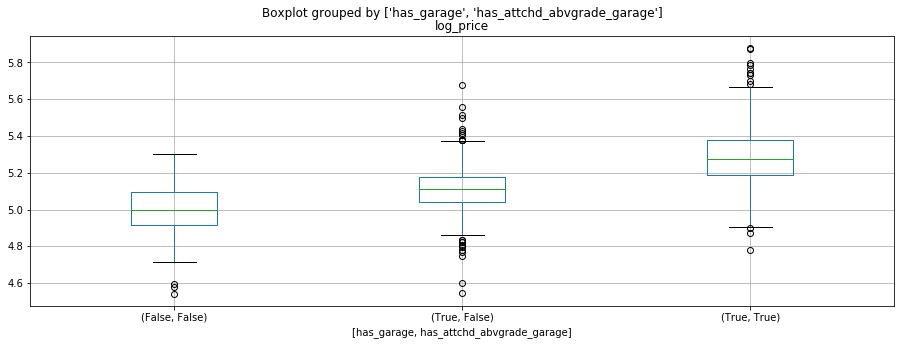

In [40]:
train.boxplot('log_price', ['has_garage','has_attchd_abvgrade_garage'], figsize=(15,5))
plt.show()

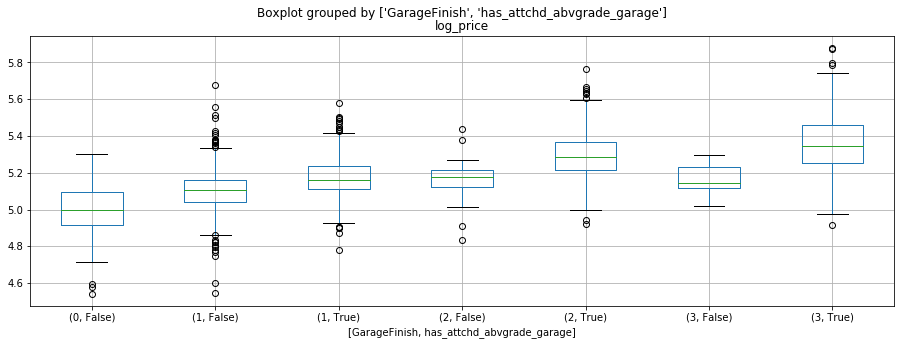

In [41]:
train.boxplot('log_price', ['GarageFinish','has_attchd_abvgrade_garage'], figsize=(15,5))

Garage variables seem to work systematically and additively on `log_price`, which is nice.

In [42]:
train['new_home'] = train['SaleType'] == 'New'

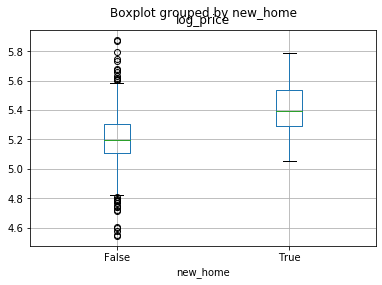

In [43]:
train.boxplot('log_price', 'new_home')

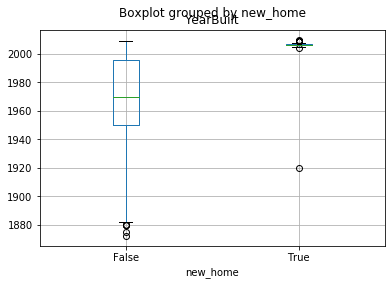

In [44]:
train.boxplot('YearBuilt', 'new_home')

A home can't be new and built in 1920 in this dataset, as sales only go back to 2006. Inspect this row and potentially omit from analysis.

In [45]:
train.loc[train['new_home'] & (train['YearBuilt'] < 2004)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,near_positive_feature,on_main_road,on_feeder,big_1fam,small_1fam,concrete_foundation,nontyp_fun,has_garage,has_attchd_abvgrade_garage,new_home
48,49,190,RM,4456,Pave,True,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,False,False,False,False,False,True


It was remodelled in 2008 and presumably marketed as essentially a new home after that. If using construction dates, it might be best to use `YearRemodAdd`, which defaults to `YearBuilt` if no work has been done?

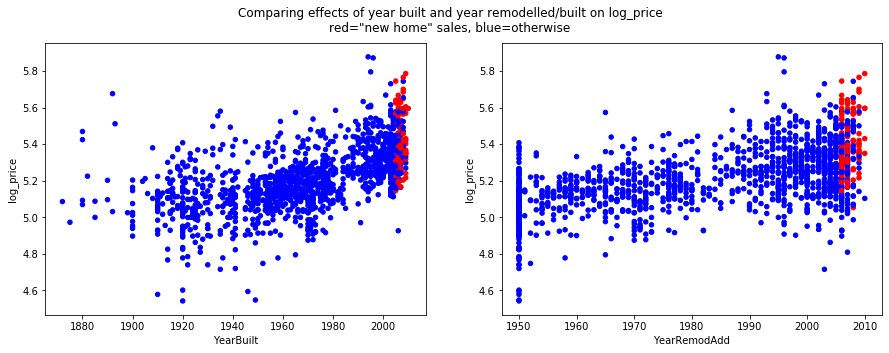

In [46]:
p_color = {True: 'red', False: 'blue'}
f,(a1,a2) = plt.subplots(ncols=2, figsize=(15,5))
train.plot.scatter('YearBuilt', 'log_price', ax=a1, color=[p_color[i] for i in train['new_home']])
train.plot.scatter('YearRemodAdd', 'log_price', ax=a2, color=[p_color[i] for i in train['new_home']])
f.suptitle('Comparing effects of year built and year remodelled/built on log_price\nred="new home" sales, blue=otherwise')
plt.show()

In [47]:
test['YearRemodAdd'].describe()

count    1459.000000
mean     1983.662783
std        21.130467
min      1950.000000
25%      1963.000000
50%      1992.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

We're predicting over the same range of `YearRemodAdd` in `test` (1950–2010), and `new_home` doesn't appear to ad a great deal whilst obviously being confounded with the year data. So we'l probably ignore `new_home` and use `YearRemodAdd`.

`YearRemodAdd` is capped at 1950 which isn't ideal, and variance increases from 1990 onwards, but I still think `YearRemodAdd` will be more predictive that `YearBuilt` across the range of data.

In [48]:
train['abnormal_sale'] = train['SaleCondition'] == 'Abnorml'
# SaleCondition == 'Partial' also distinct subgroup
# but documentation show it means it's a new home, which is info captured elsewhere.

In [49]:
train['BsmtCond'] = train['BsmtCond'].infer_objects()

In [50]:
nhood_dummies = pd.get_dummies(train['nhood2'], prefix='nhood')
train = train.merge(nhood_dummies, left_index=True, right_index=True)

## Further exploration

First intuition about which explanatory variables might be most important:
* Property area variables
* Property quality variables (esp OverallQual)
* Number of rooms variables
* Neighborhood
* YrSold, MoSold
* YearRemodAdd
* Garage variables
* Basement variables

It might be interesting to also look at some combinations or principal components of home square footage, number of rooms and quality metrics.

Pairplots show that `OverallCond` and `ExterCond` are somewhat redundant as they're correlated with their `*Qual` counterparts but noisier association with log_price.

In [51]:
train.drop(columns=['OverallCond','ExterCond'], inplace=True)

Newer homes don't have larger lot area on average, but do tend to have more living space and better quality too.

### Property area variables

In [52]:
# train['liveable_bsmt_area'] = train.apply(lambda r: np.sum([r['BsmtFinSF1'] if (r['BsmtFinType1'] >= 4) else 0] + [r['BsmtFinSF2'] if (r['BsmtFinType2'] >= 4) else 0], axis=0), axis=1)
# train['prop_bsmt_liveable'] = train.apply(lambda r: np.round([r['liveable_bsmt_area'] / r['TotalBsmtSF'] if (r['TotalBsmtSF'] > 0) else 0], decimals=3), axis=1)
# train['prop_bsmt_liveable'] = train['prop_bsmt_liveable'].astype(float)
# train['liveable_bsmt_area_sqrt'] = np.sqrt(train['liveable_bsmt_area'])
# train['total_bsmt_area_sqrt'] = np.sqrt(train['TotalBsmtSF'])
train['total_porch_area'] = np.sum(train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch']], axis=1)

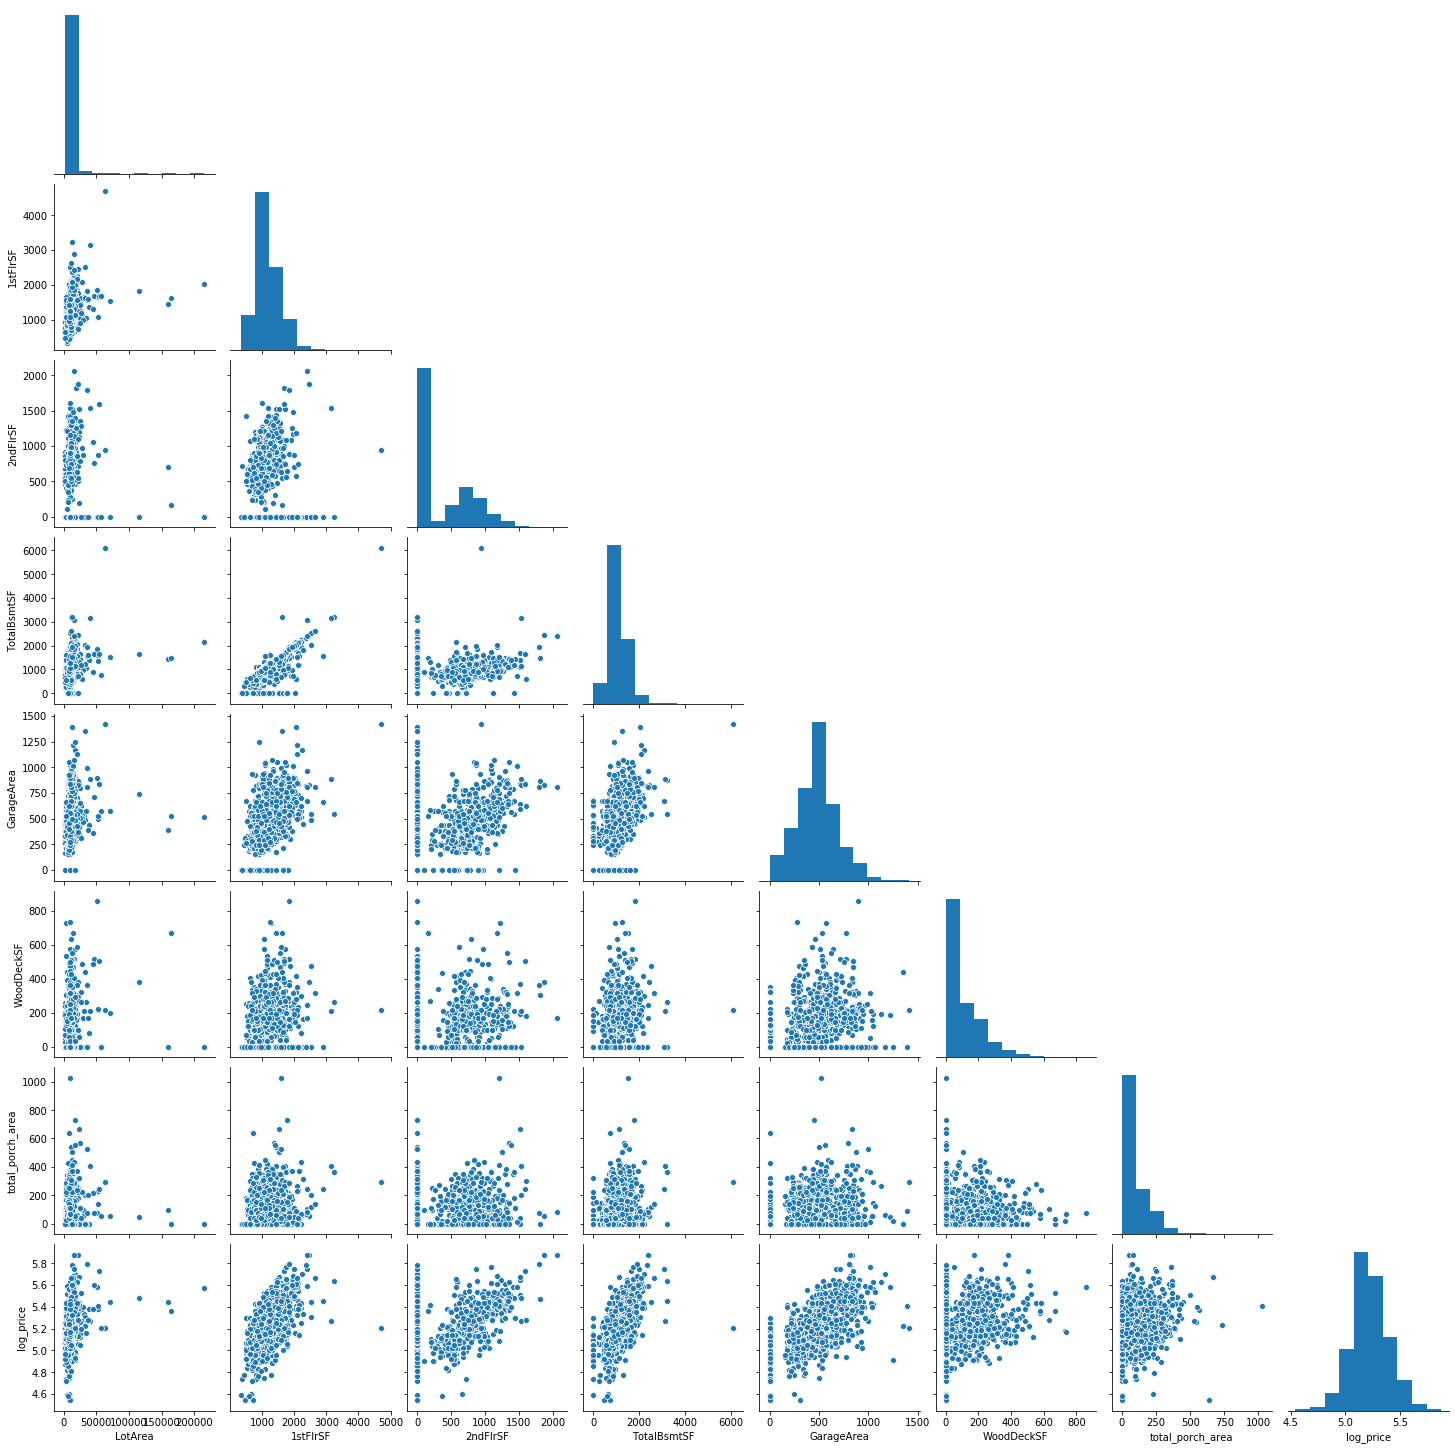

In [53]:
sns.pairplot(train[['LotArea','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea','WoodDeckSF','total_porch_area','log_price']], corner=True)
plt.show()

Signs that `LotArea` and some other variables might benefit from transformation.

However, these area variables are clearly colinear, which we'll want to consider in the modelling. Maybe PCA will help.

In [54]:
train['lot_area_log'] = np.log(train['LotArea'])
# train['abvgrd_area_sqrt'] = np.sqrt(train['GrLivArea'])

In [55]:
area_pca = prince.PCA(n_components=5, n_iter=3, rescale_with_mean=True, rescale_with_std=True, random_state=0)
area_pca = area_pca.fit(train[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])

In [56]:
area_pca.explained_inertia_

[0.5007927368022237,
 0.23023670342825878,
 0.1408426111675357,
 0.09372630136621998,
 0.03440164723576195]

In [57]:
area_pca.column_correlations(train[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])

,0,1,2,3,4
lot_area_log,0.619635,0.307124,0.707022,-0.140002,-0.047395
1stFlrSF,0.910379,-0.177303,-0.029973,0.212998,0.305788
2ndFlrSF,-0.126708,0.931737,-0.115212,0.319443,0.022207
TotalBsmtSF,0.883419,-0.180311,-0.157906,0.293905,-0.275215
GarageArea,0.703378,0.353235,-0.406481,-0.463938,-0.004366


First principal component refers to large property area in general, but particularly indoor area.

The second principal component gives weight to upstairs living space, such as bedrooms?

While the third principal component seems to relate to `LotArea` specifically, with negative correlations on indoor areas; this therefore might be describing outdoor, or garden, area?

In [58]:
# train['detach_garage_area'] = train.apply(lambda r: r['GarageArea'] if r['GarageType'] == 'Detchd' else 0, axis=1)
# train['outdoor_area_sqrt'] = np.sqrt(train.apply(lambda r: r['LotArea'] - r['GrLivArea'] - r['detach_garage_area'], axis=1))
# train['outdoor_log_ratio'] = np.log(train.apply(lambda r: r['LotArea'] / (r['GrLivArea'] + r['detach_garage_area']), axis=1))

train['area_pc1'] = area_pca.row_coordinates(train[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])[0]
train['area_pc2'] = area_pca.row_coordinates(train[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])[1]
train['area_pc3'] = area_pca.row_coordinates(train[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])[2]

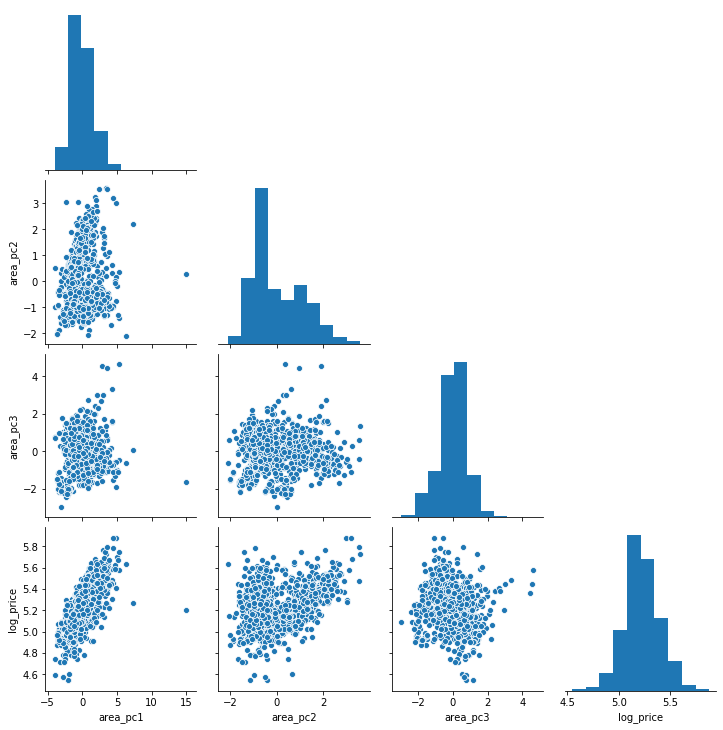

In [59]:
sns.pairplot(train[['area_pc1','area_pc2','area_pc3','log_price']], corner=True)
plt.show()

What's this outlying observation?

In [60]:
train.loc[train['area_pc1'] > 10,['area_pc1','SalePrice','LotArea','lot_area_log','GrLivArea','OverallQual','SaleType','SaleCondition','MSZoning','Neighborhood','Condition1']]

,area_pc1,SalePrice,LotArea,lot_area_log,GrLivArea,OverallQual,SaleType,SaleCondition,MSZoning,Neighborhood,Condition1
1298,15.021126,160000,63887,11.064871,5642,10,New,Partial,RL,Edwards,Feedr


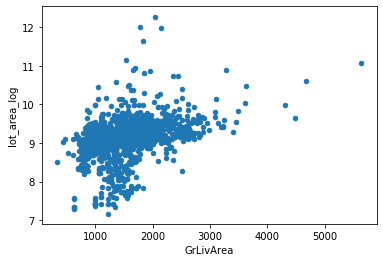

In [61]:
train.plot.scatter('GrLivArea', 'lot_area_log')

The outlying house sold for much lower than others did given its extraordinary size of living space. The house isn't agricultural land, so that's not the reason. It looks normal and high-quality in many ways. But it is situated in one of the cheapest neighborhoods, so maybe that has something to do with it?

It's not obvious that this outlier is due to erroneous data, so we'll keep it in.

### Property quality variables

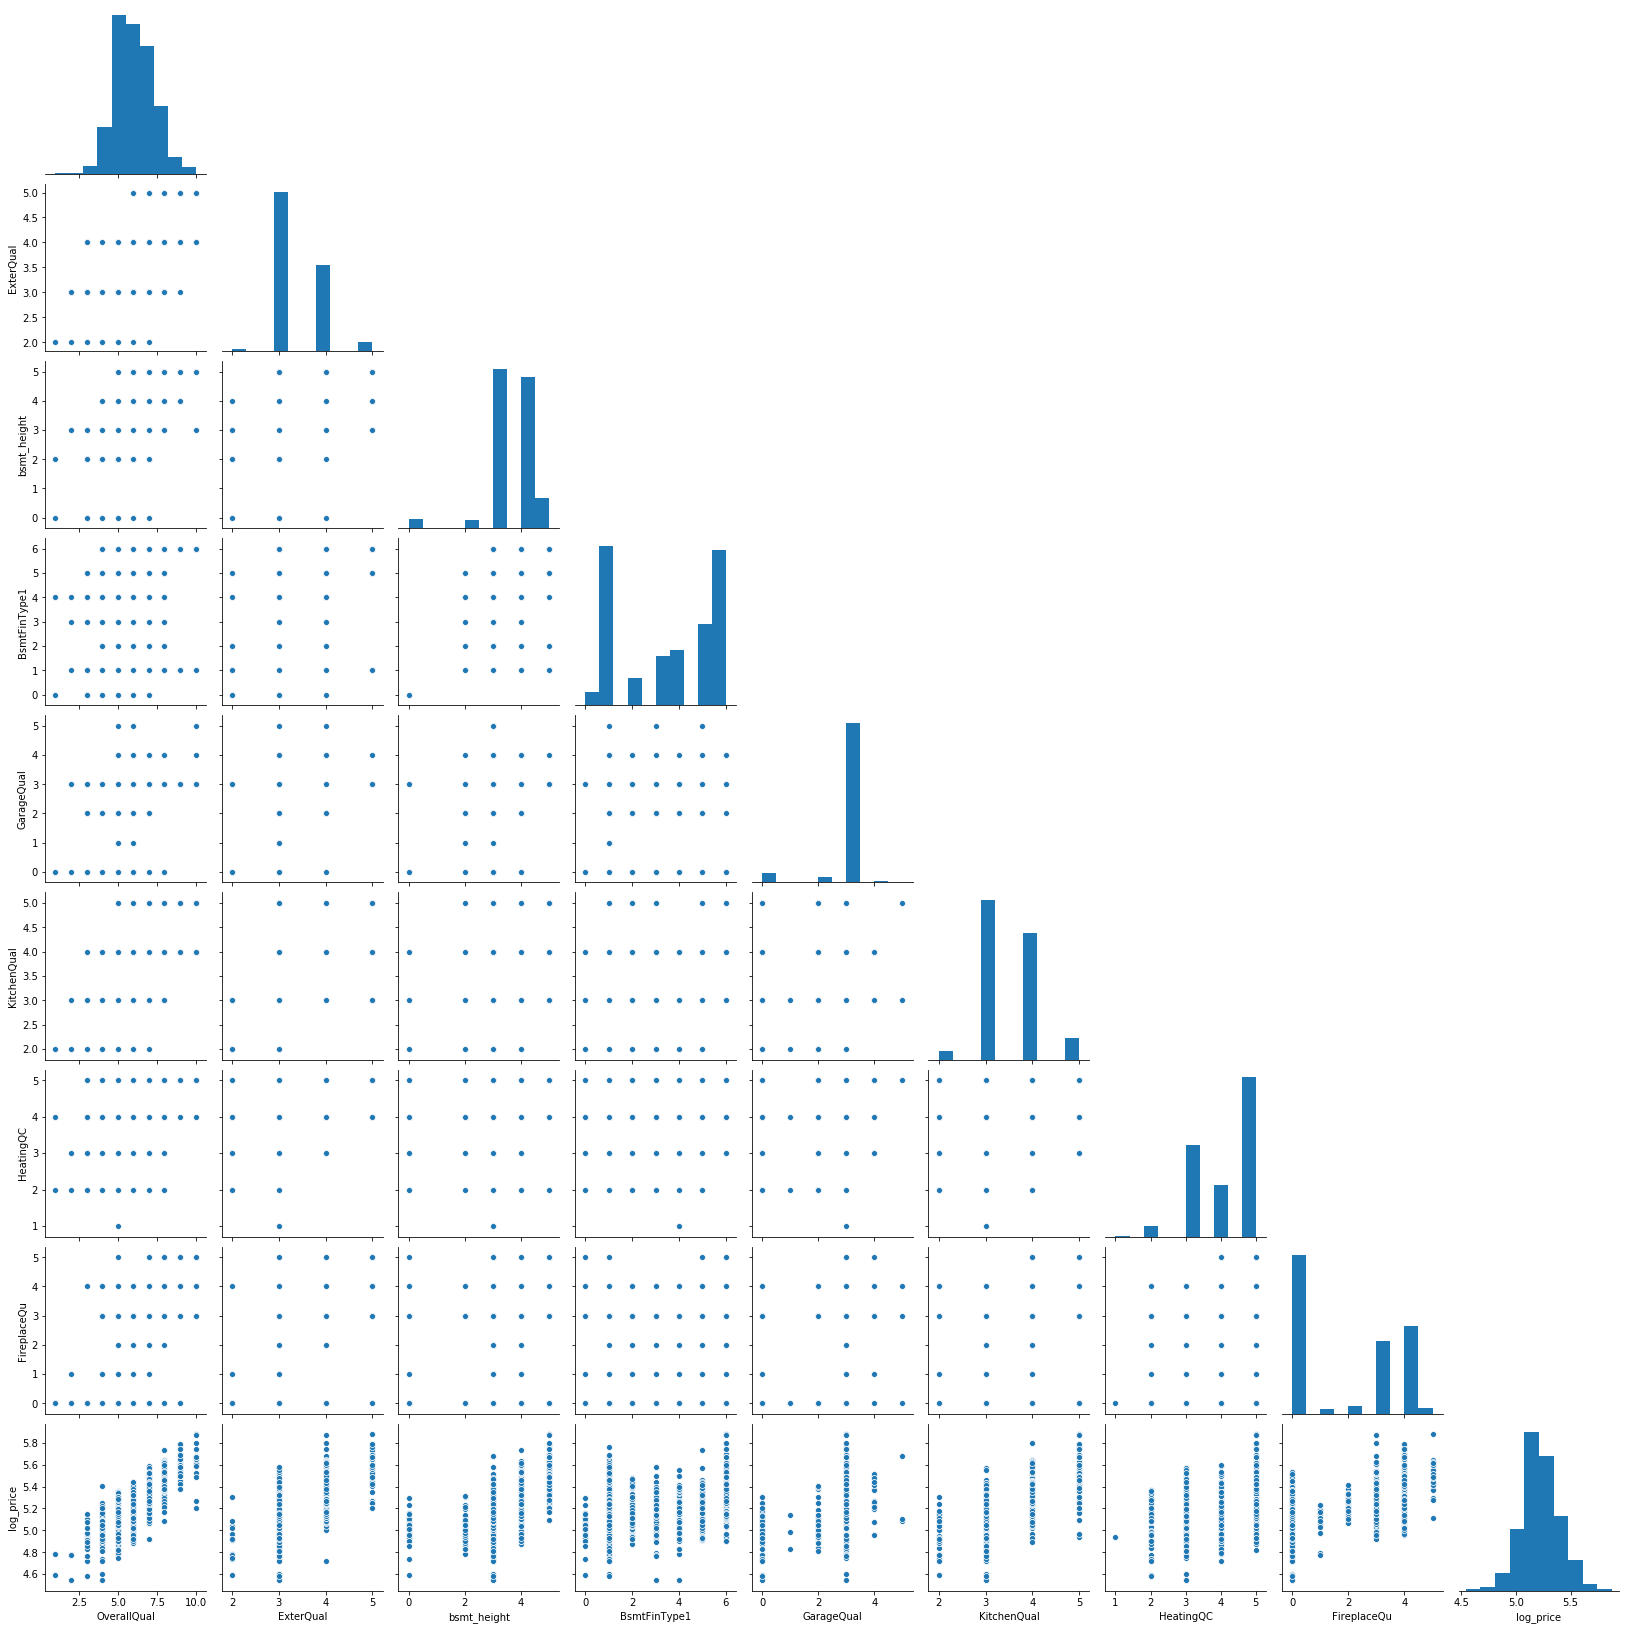

In [62]:
quals_df = train[['OverallQual','ExterQual','bsmt_height','BsmtFinType1','GarageQual','KitchenQual','HeatingQC','FireplaceQu']]
sns.pairplot(quals_df.merge(train[['log_price']], left_index=True, right_index=True), corner=True)
plt.show()

In [63]:
# qual_pca = prince.PCA(n_components=5, n_iter=3, rescale_with_mean=True, rescale_with_std=True, random_state=0)
# qual_pca = pca.fit(quals_df)
# qual_pca.explained_inertia_

Use `OverallQual`.

`BsmtFinType1` and `GarageQual` aren't strongly correlated with `OverallQual` it seems (`GarageQual` to some extent), and might help explain house prices.

`HeatingQC` also?

I would expect `KitchenQual` to be important but it looks like it's correlated with `OverallQual` so we might do without.

### Number of rooms variables

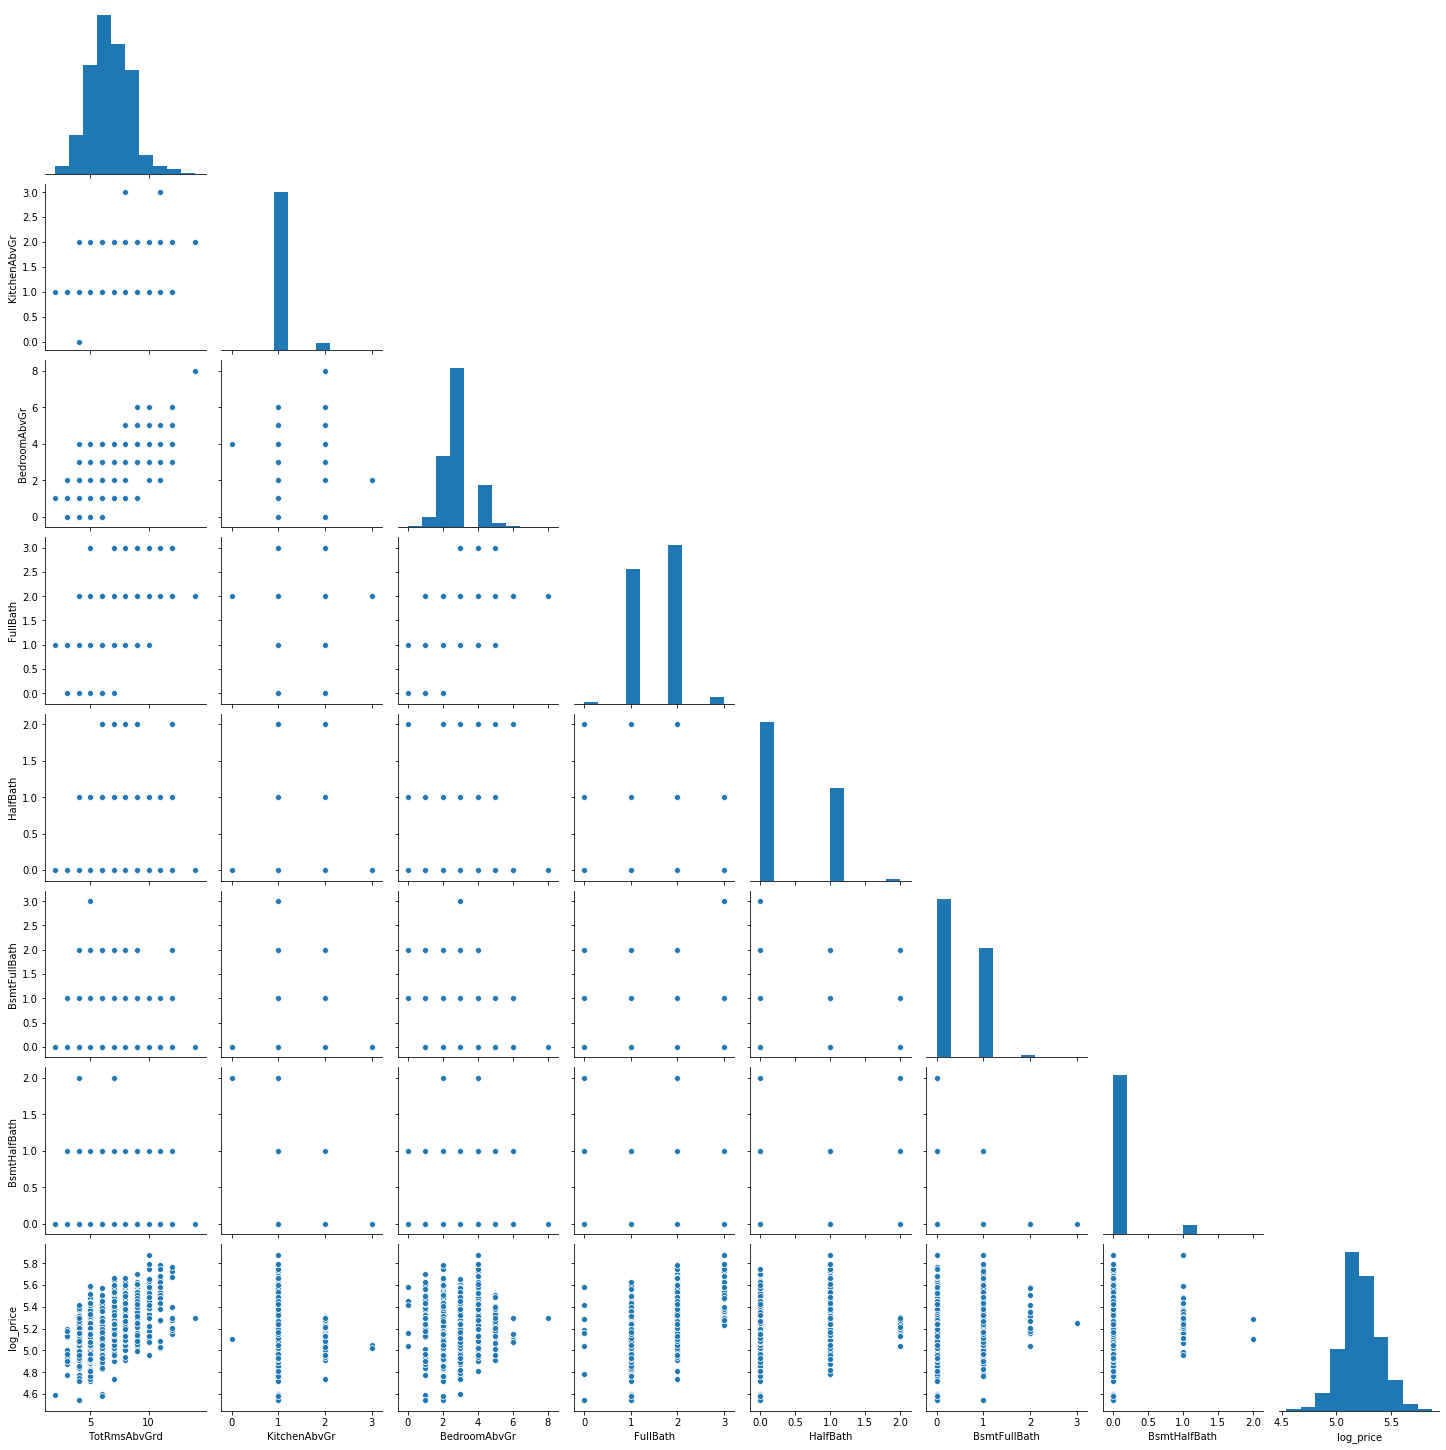

In [64]:
rooms_df = train[['TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']]
sns.pairplot(rooms_df.merge(train[['log_price']], left_index=True, right_index=True), corner=True)
plt.show()

`TotRmsAbvGrd` appears satisfactory on its own.

Number of bathrooms and bedrooms are highly correlated with total rooms (expected) and yet surprisingly unrelated to `log_price` (especially in the case of bedrooms).

Basement bathrooms don't seem to add much value.

### House prices over time

In [65]:
train.rename(columns={'YrSold':'year', 'MoSold':'month'}, inplace=True)
train['day'] = 1
train['date_sold'] = pd.to_datetime(train[['year','month','day']])

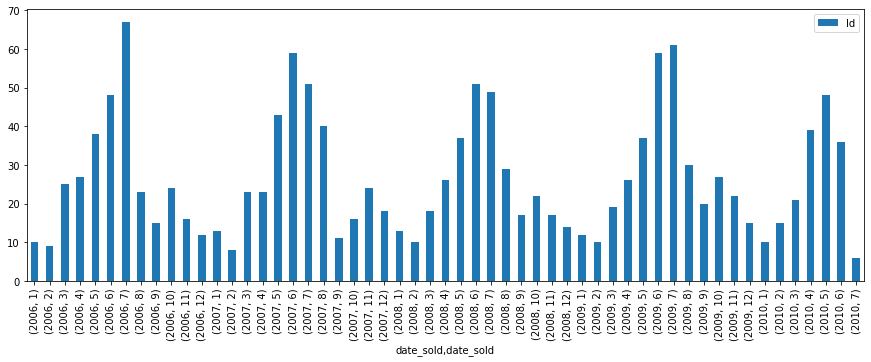

In [66]:
train.groupby([train['date_sold'].dt.year, train['date_sold'].dt.month]).count()[['Id']].plot(kind='bar', figsize=(15,5))
plt.show()

House sales show seasonality, with most houses being sold in the summer and fewest in the winter. This may not have direct impact on sale price, but then the house market is demand driven and so house prices may be higher in the summer relative to winter, due to higher demand?

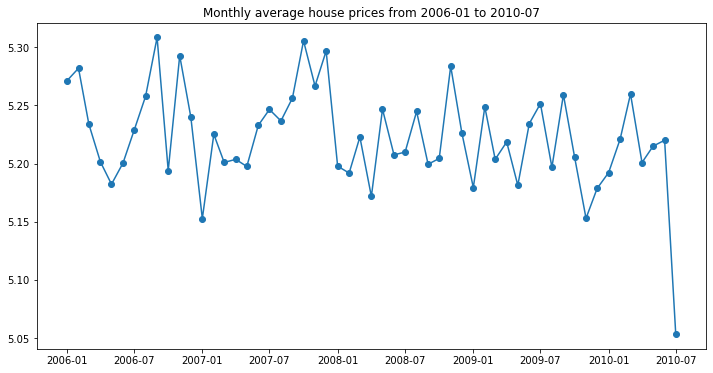

In [67]:
f,ax = plt.subplots(figsize=(12,6))
sales_over_time = train[['date_sold','log_price','SalePrice']].groupby(['date_sold']).mean()
plt.plot_date(x=sales_over_time.index, y=sales_over_time['log_price'], linestyle='-')
plt.title('Monthly average house prices from 2006-01 to 2010-07')
# plt.plot_date(x=train['date_sold'], y=train['log_price'])
plt.show()

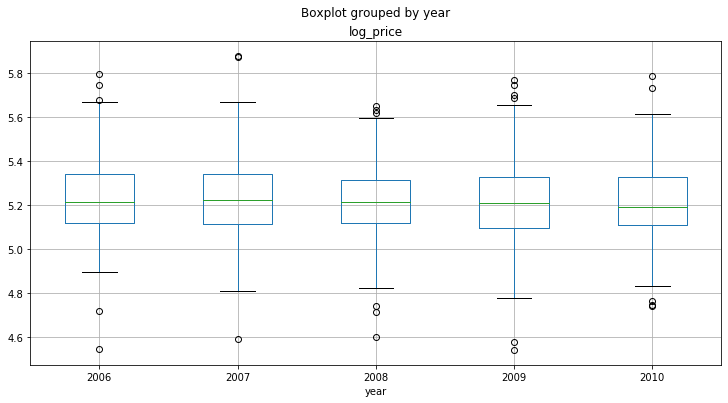

In [68]:
# f,ax = plt.subplots(figsize=(8,5))
# sns.boxplot(x='year', y='log_price', data=train)
# plt.show()
train.boxplot('log_price', 'year', figsize=(12,6))

Doesn't seem to be any long-term trends in house prices, with the mean and variance appearing fairly constant among years.

This tracks with [external data](https://drive.google.com/file/d/1dBxJC09dbjR1eCvGuKQtfMRmnxJFoDBu/view?usp=sharing) reasonably well, so no signs yet that our data is a non-random sample of sales in Ames, Iowa.

However, due to the seasonality mentioned above and the demand-driven nature of the market, it may be worth including `month` in the analysis?

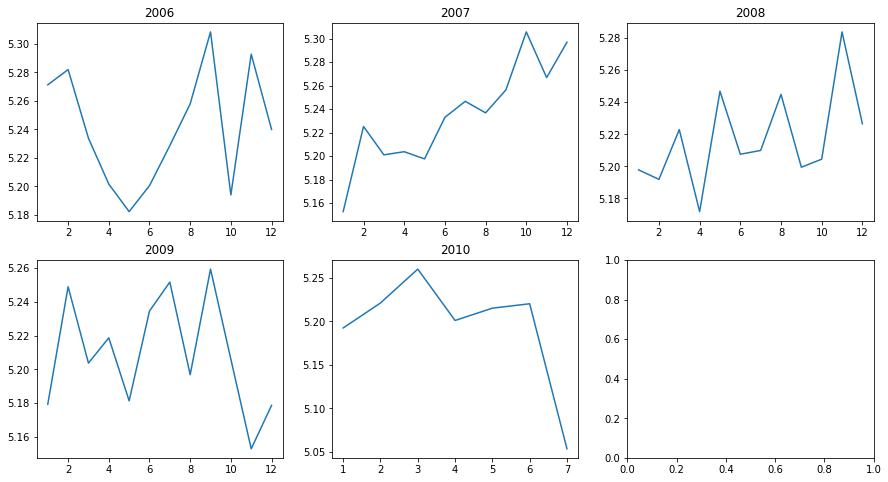

In [69]:
sales_time_sm = train[['year','month','log_price']].groupby(['year','month'], as_index=False).mean()
f,axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axes[0,0].plot('month', 'log_price', data=sales_time_sm.loc[sales_time_sm['year'] == 2006])
axes[0,0].set_title('2006')
axes[0,1].plot('month', 'log_price', data=sales_time_sm.loc[sales_time_sm['year'] == 2007])
axes[0,1].set_title('2007')
axes[0,2].plot('month', 'log_price', data=sales_time_sm.loc[sales_time_sm['year'] == 2008])
axes[0,2].set_title('2008')
axes[1,0].plot('month', 'log_price', data=sales_time_sm.loc[sales_time_sm['year'] == 2009])
axes[1,0].set_title('2009')
axes[1,1].plot('month', 'log_price', data=sales_time_sm.loc[sales_time_sm['year'] == 2010])
axes[1,1].set_title('2010')
plt.show()

If market demand really is important, then month of the year probably isn't the best way to show it. Maybe the inverse of the number of houses sold in the same neighbourhood in the same month, or previous months? That's measuring low supply and assuming it refers to higher demand relative to supply.

Maybe too involved to deal with now, but food for thought...

## Prepare for modelling

Drop unneccessary categorical columns for tidyness.

In [70]:
# train.drop(columns=['MSZoning'], inplace=True) # Almost all observations in RL category.
# train.drop(columns=['Street'], inplace=True) # Almost all observations in Pave category.
# train.drop(columns=['LotShape'], inplace=True) # Almost all observations in Pave category.
# train.drop(columns=['LandContour'], inplace=True) # Most Lvl and not clear differences.
# train.drop(columns=['Utilities'], inplace=True) # All but one AllPub. Check other as outlier later.
# train.drop(columns=['LotConfig'], inplace=True) # Use in_culdesac dummy var
# train.drop(columns=['LandSlope'], inplace=True) # Low n
# train.drop(columns=['Neighborhood'], inplace=True) # Collapsed low N groups into 'other' in nhood2
# train.drop(columns=['Condition1'], inplace=True)# Extracted value
# train.drop(columns=['Condition2'], inplace=True)# Extracted value
# train.drop(columns=['BldgType'], inplace=True) # Not strong diffs, other than what was teased out
# train.drop(columns=['HouseStyle'], inplace=True) # Not strong diffs, other than what was teased out
# train.drop(columns=['RoofStyle'], inplace=True) # Not strong diffs
# train.drop(columns=['RoofMatl'], inplace=True) # Almost all CompShg
# train.drop(columns=['Exterior1st'], inplace=True) # Too variable
# train.drop(columns=['Exterior2nd'], inplace=True) # Too variable
# train.drop(columns=['Foundation'], inplace=True) # Extracted PConc
# train.drop(columns=['Heating'], inplace=True) # Almost all GasA
# train.drop(columns=['Electrical'], inplace=True) # Extracted value
# train.drop(columns=['Functional'], inplace=True) # Extracted value
# train.drop(columns=['GarageType'], inplace=True) # Extracted value
# train.drop(columns=['BsmtExposure'], inplace=True) # Not systematic trend
# train.drop(columns=['SaleType'], inplace=True) # Noisy and low Ns, new_home extracted
# train.drop(columns=['SaleCondition'], inplace=True) # Noisy and low Ns, abnormal_sale extracted
# train.drop(columns=['MSSubClass'], inplace=True) # Info on age and storys of house captured elsewhere
# train.drop(columns=['nhood2'], inplace=True) # Created dummy vars
# train.drop(columns=['BsmtFullBath'], inplace=True) # Created dummy vars
# train.drop(columns=['BsmtHalfBath'], inplace=True) # Created dummy vars
# train.drop(columns=['HalfBath'], inplace=True) # Created dummy vars
# train.drop(columns=['OpenPorchSF'], inplace=True) # Created dummy vars
# train.drop(columns=['EnclosedPorch'], inplace=True) # Created dummy vars
# train.drop(columns=['3SsnPorch'], inplace=True) # Created dummy vars
# train.drop(columns=['ScreenPorch'], inplace=True) # Created dummy vars

Explanatory variables we want to include in the model:

In [71]:
ex_vars = (['area_pc1','area_pc2','area_pc3','TotRmsAbvGrd','OverallQual','YearRemodAdd'] +
           list(train.columns.values[[('nhood_' in c) and (c != 'nhood_num') for c in train.columns]]) +
           ['BsmtFinType1','GarageQual', 'has_attchd_abvgrade_garage','big_1fam','near_positive_feature',
            'on_main_road','concrete_foundation','nontyp_fun','abnormal_sale','has_alley','has_fireplace'])

In [72]:
len(ex_vars)

34

In [73]:
mod_df = train[['log_price'] + ex_vars]

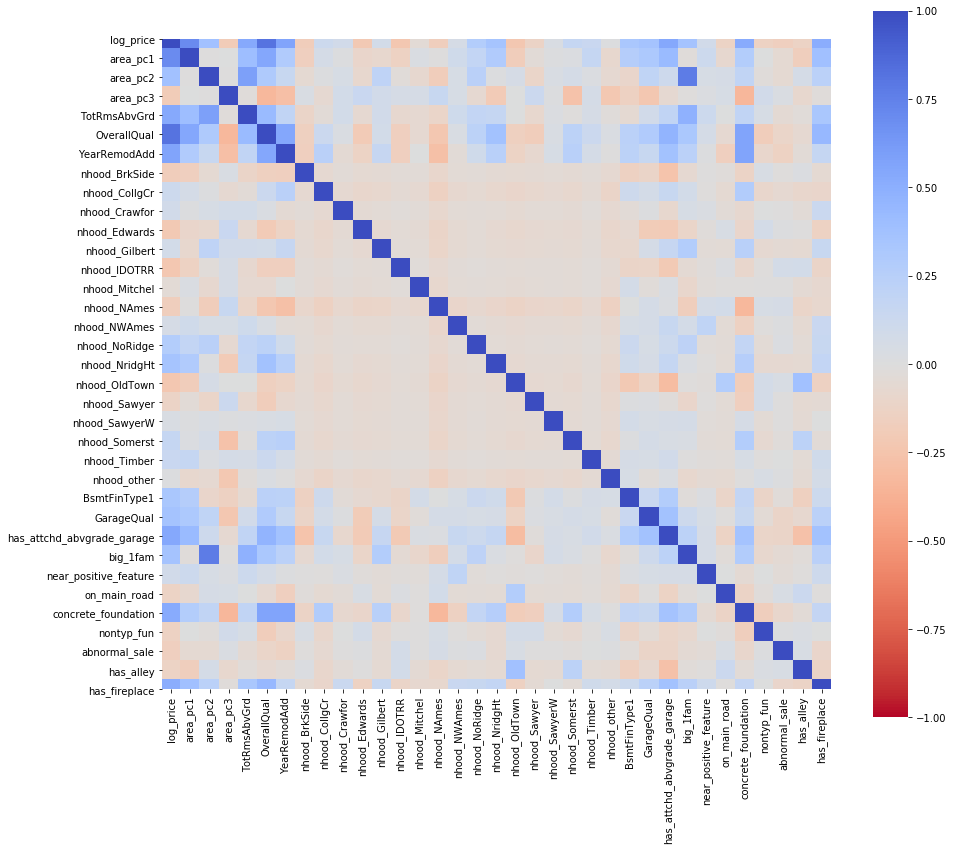

In [74]:
var_corrmat = mod_df.corr()
f,a = plt.subplots(figsize=(15,13))
sns.heatmap(var_corrmat, vmin=-1, vmax=1, center=0, square=True, cmap='coolwarm_r')
plt.show()

Thoughts on the above correlation matrix:
* It's possible that the first six explanatory variables might do the heavy lifting here, probably some of the other variables won't be very predictive of log_price.
* However, some dummy variables at the end are some of the few variables that are negatively correlated with log_price. E.g., `on_main_road`, `nontyp_fun`, and `abnormal_sale`.
* Also, `BsmtFinType1`, `GarageQual`, and `has_attchd_abvgrade_garage` still look useful.
* `big_1fam` is strongly positively correlated with area_pc2, which makes sense because both variables describe houses that have extensive upstairs area (but in different ways).
* Having a `concrete_foundation` is strongly associated with higher quality and newer houses. May be a candidate for dropping?
* Similarly, `has_fireplace` is associated with better, larger houses that have more rooms. Which kind of makes sense. So might be another candidate for dropping.
* Neighbourhoods are of course uncorrelated.
* `area_pc3`, which seemed to capture information about the size of outdoor space, is associated with older homes and also lower quality(?).

Given that a subset of explanatory variables seem most important, and that there isn't a crazy amount of collinearity going on, lasso may be a preferred method of shrinkage to ridge – if we decide to go down that road.

But let's keep it simple OLS for now.

In [75]:
X_train, X_validate, y_train, y_validate = train_test_split(mod_df[ex_vars], mod_df['log_price'],
                                                            test_size=0.2, random_state=0)

In [76]:
print(X_train.shape)
print(X_validate.shape)
print(y_train.shape)
print(y_validate.shape)

(1167, 34)
(292, 34)
(1167,)
(292,)


## Linear regression

In [77]:
lm = LinearRegression()
lr_fit = lm.fit(X_train, y_train)

lr_fitted = lm.predict(X_train)
lr_resids = y_train - lr_fitted
lr_preds = lm.predict(X_validate)

In [78]:
lr_resids.describe()

count    1.167000e+03
mean    -3.196529e-17
std      6.187662e-02
min     -7.514447e-01
25%     -2.941555e-02
50%      1.978124e-03
75%      3.289054e-02
max      2.118524e-01
Name: log_price, dtype: float64

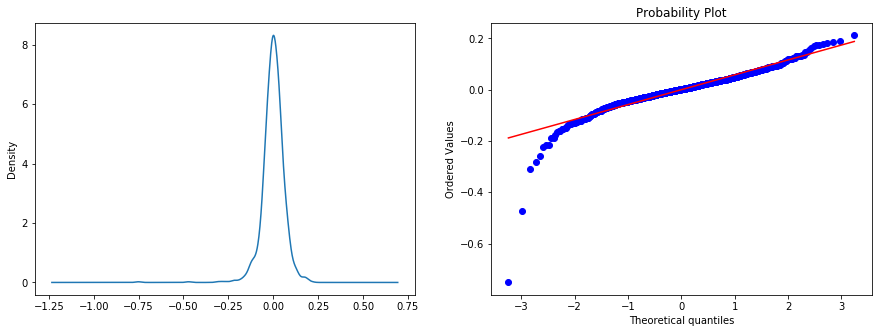

In [79]:
f,(a1,a2) = plt.subplots(ncols=2, figsize=(15,5))
lr_resids.plot.kde(figsize=(15,5), ax=a1)
probplot(lr_resids, plot=a2)
plt.show()

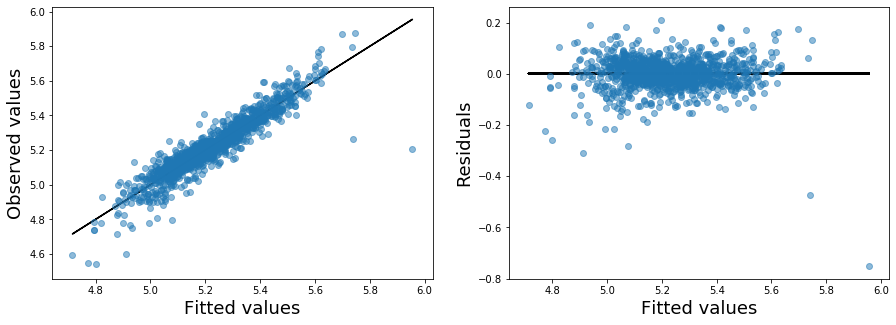

In [80]:
f,(a1,a2) = plt.subplots(ncols=2, figsize=(15,5))
a1.plot(lr_fitted, lr_fitted, '-', color='black', zorder=1)
a1.scatter(lr_fitted, y_train, alpha=0.5, zorder=2)
a1.set_xlabel('Fitted values', fontsize=18)
a1.set_ylabel('Observed values', fontsize=18)
a2.plot(lr_fitted, [0]*len(lr_fitted), '--', antialiased=False, color='black', zorder=1)
a2.scatter(lr_fitted, lr_resids, alpha=0.5, zorder=2)
a2.set_xlabel('Fitted values', fontsize=18)
a2.set_ylabel('Residuals', fontsize=18)
plt.show()

In [81]:
X_train.loc[lr_fitted > 5.8,:]

,area_pc1,area_pc2,area_pc3,TotRmsAbvGrd,OverallQual,YearRemodAdd,nhood_BrkSide,nhood_CollgCr,nhood_Crawfor,nhood_Edwards,...,GarageQual,has_attchd_abvgrade_garage,big_1fam,near_positive_feature,on_main_road,concrete_foundation,nontyp_fun,abnormal_sale,has_alley,has_fireplace
1298,15.021126,0.290309,-1.643859,12,10,2008,0,0,0,1,...,3,True,True,False,False,True,False,False,False,True


In [82]:
high_lev_obs = X_train.loc[lr_fitted > 5.8,:].index

That outlying value we spotted earlier when exploring the property area variables (see that `area_pc1=15.02` in the above table extract) has extreme leverage on the model fit. It's clear that model fit would improve if we removed this value.

Just to check removing this observation does add predictive power, we'll record some test scores on this run and compare them with the next lm that omits the outlier.

In [83]:
lr_fit.score(X_validate, y_validate)

0.8691943641978452

In [84]:
mean_squared_error(y_validate, lr_preds)

0.004064874657614794

### Drop high leverage value and re-run

In [85]:
mod_df2 = mod_df.drop(index=high_lev_obs)
X_train, X_validate, y_train, y_validate = train_test_split(mod_df2[ex_vars], mod_df2['log_price'],
                                                            test_size=0.2, random_state=0)

In [86]:
lm = LinearRegression()
lr_fit = lm.fit(X_train, y_train)

lr_fitted = lr_fit.predict(X_train)
lr_resids = y_train - lr_fitted
lr_preds = lr_fit.predict(X_validate)

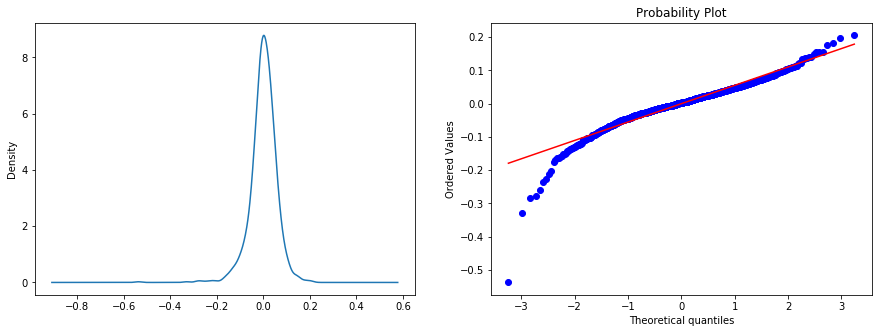

In [87]:
f,(a1,a2) = plt.subplots(ncols=2, figsize=(15,5))
lr_resids.plot.kde(figsize=(15,5), ax=a1)
probplot(lr_resids, plot=a2)
plt.show()

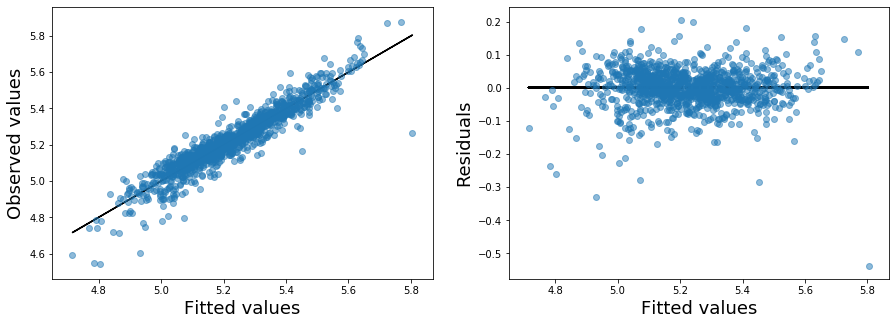

In [88]:
f,(a1,a2) = plt.subplots(ncols=2, figsize=(15,5))
a1.plot(lr_fitted, lr_fitted, '-', color='black', zorder=1)
a1.scatter(lr_fitted, y_train, alpha=0.5, zorder=2)
a1.set_xlabel('Fitted values', fontsize=18)
a1.set_ylabel('Observed values', fontsize=18)
a2.plot(lr_fitted, [0]*len(lr_fitted), '--', antialiased=False, color='black', zorder=1)
a2.scatter(lr_fitted, lr_resids, alpha=0.5, zorder=2)
a2.set_xlabel('Fitted values', fontsize=18)
a2.set_ylabel('Residuals', fontsize=18)
plt.show()

In [89]:
lr_coefs = pd.DataFrame(list(zip(X_train.columns.values, np.round(lr_fit.coef_, 3))), columns=['feature','coef'])
lr_coefs.sort_values(by=['coef'], ascending=False)

,feature,coef
8,nhood_Crawfor,0.059
0,area_pc1,0.042
16,nhood_NridgHt,0.035
4,OverallQual,0.034
15,nhood_NoRidge,0.033
20,nhood_Somerst,0.029
22,nhood_other,0.028
1,area_pc2,0.027
33,has_fireplace,0.022
6,nhood_BrkSide,0.014


I think we have some collinearity here, because `near_positive_feature` was estimated to have a negative effect when the data show it to have a positive effect. It may be estimating this coefficient poorly due to covariance with another explanatory variable. Still, most coefficients make sense and some look interesting.

All else being equal, if a house's overall quality increase by 1 then that translates into a roughly 3.5% increase in resale value?

In [90]:
lr_fit.score(X_validate, y_validate)

0.8870743435685228

In [91]:
mean_squared_error(y_validate, lr_preds)

0.00370609430654417

Dropping that outlying value has marginally improved the diagnostic plots, but notably improved R^2 and RMSE on the validation data.

#### Cross-validate

In [92]:
k_fold = KFold(5, random_state=0)
X = mod_df2[ex_vars]
y = mod_df2['log_price']
n_splits = 5
X_sets = np.array_split(X, n_splits)
y_sets = np.array_split(y, n_splits)

lm_r2s = []
lm_rmses = []

for i in range(n_splits):
    X_test = X_sets[i]
    y_test = y_sets[i]
    X_train = X.drop(index=X_test.index)
    y_train = y.drop(index=y_test.index)
    
    lm = LinearRegression()
    lr_fit = lm.fit(X_train, y_train)
    
    lm_r2s.append(lr_fit.score(X_test, y_test))
    lm_rmses.append(mean_squared_error(y_test, lr_fit.predict(X_test)))
    print("[fold {0}] R^2: {1:.3f}, RMSE: {2:.5f}".
      format(i, lr_fit.score(X_test, y_test), mean_squared_error(y_test, lr_fit.predict(X_test))))
print("")
print(f"Cross-validated R^2: {round(np.mean(lm_r2s)*100, 1)}%")
print(f"Cross-validated RMSE: {round(np.mean(lm_rmses), 5)}")

[fold 0] R^2: 0.886, RMSE: 0.00320
[fold 1] R^2: 0.862, RMSE: 0.00472
[fold 2] R^2: 0.891, RMSE: 0.00345
[fold 3] R^2: 0.876, RMSE: 0.00340
[fold 4] R^2: 0.884, RMSE: 0.00334

Cross-validated R^2: 88.0%
Cross-validated RMSE: 0.00362


### Ordinary next steps

There is still some structure in the residuals. We tend to predict typical house prices very well. But low house prices are overpredicted and high house prices underpredicted.

The overprediction of low house prices is particularly important by the looks of it.

Ordinarily, there are several steps I would take to improve the model fit further:
1. Plot the residuals against explanatory variables to see if I'm missing any structure. E.g., any polynomials needed?
2. Plot the residuals against variables NOT included in the model, to see if any extra additions are likely to further explain house prices.
3. Regarding step 2, I'd pay particulat attention to finding variables that might decrease a house's sale value.

However, for now we'll leave it there and try a more complex model.

----------------------

## Random Forest regression

In [93]:
X_train, X_validate, y_train, y_validate = train_test_split(mod_df2[ex_vars], mod_df2['log_price'],
                                                            test_size=0.2, random_state=0)

In [94]:
rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf_fit = rf.fit(X_train, y_train)
rf_fitted = rf_fit.predict(X_train)
rf_resids = y_train - rf_fitted
rf_preds = rf_fit.predict(X_validate)

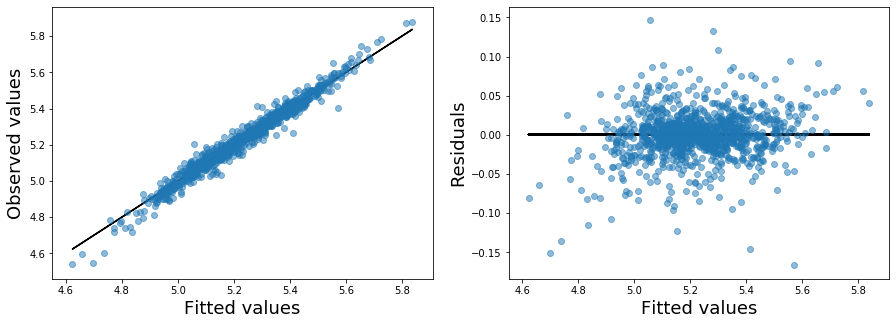

In [95]:
f,(a1,a2) = plt.subplots(ncols=2, figsize=(15,5))
a1.plot(rf_fitted, rf_fitted, '-', color='black', zorder=1)
a1.scatter(rf_fitted, y_train, alpha=0.5, zorder=2)
a1.set_xlabel('Fitted values', fontsize=18)
a1.set_ylabel('Observed values', fontsize=18)
a2.plot(rf_fitted, [0]*len(rf_fitted), '--', antialiased=False, color='black', zorder=1)
a2.scatter(rf_fitted, rf_resids, alpha=0.5, zorder=2)
a2.set_xlabel('Fitted values', fontsize=18)
a2.set_ylabel('Residuals', fontsize=18)
plt.show()

Extremely good model fit.

In [96]:
rf_var_importances = pd.DataFrame(list(zip(X_train.columns.values, np.round(rf_fit.feature_importances_, 3))), columns=['feature','importance'])
rf_var_importances.sort_values(by=['importance'], ascending=False)

,feature,importance
4,OverallQual,0.597
0,area_pc1,0.181
1,area_pc2,0.071
5,YearRemodAdd,0.030
2,area_pc3,0.021
33,has_fireplace,0.013
3,TotRmsAbvGrd,0.013
23,BsmtFinType1,0.012
11,nhood_IDOTRR,0.010
31,abnormal_sale,0.006


In [97]:
rf_fit.score(X_validate, y_validate)

0.8718640115310664

In [98]:
mean_squared_error(y_validate, rf_preds)

0.004205280468006684

The random forest regression looks like it's going to perform more poorly than the OLS regression! Despite a much nicer model fit to the training data. This suggests the random forest has overfitted, which I was not expecting at all.

Judging by the feature importances it might have something to do with the variables included. `has_fireplace` received a higher importance than the number of rooms, suggesting the random forest hasn't done a good job a wittling down the variables. Might get a better fit on the validation set if some variables were removed.

But still, we'll do cross-validation now and then wait and see what results we get on the submission test data.

#### Cross-validate

In [99]:
k_fold = KFold(5, random_state=0)
X = mod_df2[ex_vars]
y = mod_df2['log_price']
n_splits = 5
X_sets = np.array_split(X, n_splits)
y_sets = np.array_split(y, n_splits)

rf_r2s = []
rf_rmses = []

for i in range(n_splits):
    X_test = X_sets[i]
    y_test = y_sets[i]
    X_train = X.drop(index=X_test.index)
    y_train = y.drop(index=y_test.index)
    
    rf = LinearRegression()
    rf_fit = rf.fit(X_train, y_train)
    
    rf_r2s.append(rf_fit.score(X_test, y_test))
    rf_rmses.append(mean_squared_error(y_test, rf_fit.predict(X_test)))
    print("[fold {0}] R^2: {1:.3f}, RMSE: {2:.5f}".
      format(i, rf_fit.score(X_test, y_test), mean_squared_error(y_test, rf_fit.predict(X_test))))
print("")
print(f"Cross-validated R^2: {round(np.mean(rf_r2s)*100, 1)}%")
print(f"Cross-validated RMSE: {round(np.mean(rf_rmses), 5)}")

[fold 0] R^2: 0.886, RMSE: 0.00320
[fold 1] R^2: 0.862, RMSE: 0.00472
[fold 2] R^2: 0.891, RMSE: 0.00345
[fold 3] R^2: 0.876, RMSE: 0.00340
[fold 4] R^2: 0.884, RMSE: 0.00334

Cross-validated R^2: 88.0%
Cross-validated RMSE: 0.00362


In [100]:
lm = LinearRegression()
lr_fit = lm.fit(mod_df2[ex_vars], mod_df2['log_price'])
rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf_fit = rf.fit(mod_df2[ex_vars], mod_df2['log_price'])

## Prepare test data

In [101]:
test['has_alley'] = np.logical_not(test['Alley'].isnull())
test['FireplaceQu'].fillna(value='NONE', inplace=True)
test['has_fireplace'] = test['Fireplaces'] > 0
test['has_circuit_breaker'] = test['Electrical'].values == 'SBrkr'

test['GarageType'].fillna(value='NONE', inplace=True)
test['GarageFinish'].fillna(value='NONE', inplace=True)
test['GarageQual'].fillna(value='NONE', inplace=True)
test['GarageCond'].fillna(value='NONE', inplace=True)
test['GarageArea'].fillna(value=0, inplace=True)
test['GarageCars'].fillna(value=0, inplace=True)

test['BsmtQual'].fillna(value='NONE', inplace=True)
test['BsmtCond'].fillna(value='NONE', inplace=True)
test['BsmtExposure'].fillna(value='NONE', inplace=True)
test['BsmtFinType1'].fillna(value='NONE', inplace=True)
test['BsmtFinType2'].fillna(value='NONE', inplace=True)
test['TotalBsmtSF'].fillna(value=0, inplace=True) # Added this because there was an NaN in test set

test['PavedDrive'] = test['PavedDrive'] == 'Y'
test['CentralAir'] = test['CentralAir'] == 'Y'

[test[c].replace(qual_map1, inplace=True) for c in qual_cols1]
[test[c].replace(qual_map2, inplace=True) for c in qual_cols2]
[test[c].replace(qual_map3, inplace=True) for c in qual_cols3]

test.rename(columns={'BsmtQual':'bsmt_height'}, inplace=True)

test['in_culdesac'] = test['LotConfig'] == 'CulDSac'

test['nhood2'] = test['Neighborhood'].replace(nhood_map)
nhood_dummies = pd.get_dummies(test['nhood2'], prefix='nhood')
test = test.merge(nhood_dummies, left_index=True, right_index=True)

test['near_positive_feature'] = test.apply(lambda r: 'Pos' in r['Condition1'] or 'Pos' in r['Condition2'], axis=1)
test['on_main_road'] = test.apply(lambda r: r['Condition1'] == 'Artery' or r['Condition2'] == 'Artery', axis=1)
test['on_feeder'] = test.apply(lambda r: r['Condition1'] == 'Feedr' or r['Condition2'] == 'Feedr', axis=1)
test['big_1fam'] = test.apply(lambda r: r['BldgType'] == '1Fam' and r['HouseStyle'] in ['2Story','2.5Fin'], axis=1)
test['concrete_foundation'] = test['Foundation'] == 'PConc'
test['nontyp_fun'] = test['Functional'] != 'Typ'

test['has_garage'] = test['GarageType'] != 'NONE'
test['has_attchd_abvgrade_garage'] = test.apply(lambda r: r['GarageType'] in ['Attchd','BuiltIn'], axis=1)

test['new_home'] = test['SaleType'] == 'New'
test['abnormal_sale'] = test['SaleCondition'] == 'Abnorml'
test['lot_area_log'] = np.log(test['LotArea'])

In [102]:
test['area_pc1'] = area_pca.row_coordinates(test[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])[0]
test['area_pc2'] = area_pca.row_coordinates(test[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])[1]
test['area_pc3'] = area_pca.row_coordinates(test[['lot_area_log','1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea']])[2]

In [103]:
test_df = test[ex_vars]
test_df

,area_pc1,area_pc2,area_pc3,TotRmsAbvGrd,OverallQual,YearRemodAdd,nhood_BrkSide,nhood_CollgCr,nhood_Crawfor,nhood_Edwards,...,GarageQual,has_attchd_abvgrade_garage,big_1fam,near_positive_feature,on_main_road,concrete_foundation,nontyp_fun,abnormal_sale,has_alley,has_fireplace
0,0.165601,0.025509,0.033903,5,5,1961,0,0,0,0,...,3,True,False,False,False,False,False,False,False,False
1,0.665645,-0.861268,1.082900,6,6,1958,0,0,0,0,...,3,True,False,False,False,False,False,False,False,False
2,-0.240765,1.103259,0.635786,6,5,1998,0,0,0,0,...,3,True,True,False,False,True,False,False,False,True
3,-0.514069,0.860046,0.139702,7,6,1998,0,0,0,0,...,3,True,True,False,False,True,False,False,False,True
4,0.140919,-1.102267,-1.036663,5,8,1992,0,0,0,0,...,3,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.757628,-0.725263,-1.225602,5,4,1970,0,0,0,0,...,0,False,False,False,False,False,False,False,False,False
1455,-3.179605,-0.296986,-1.909283,6,4,1970,0,0,0,0,...,3,False,False,False,False,False,False,True,False,False
1456,1.180099,-0.182720,1.089543,7,5,1996,0,0,0,0,...,3,False,False,False,False,False,False,True,False,True
1457,-1.284856,-1.201042,1.493611,6,5,1992,0,0,0,0,...,0,False,False,False,False,True,False,False,False,False


## Make predictions

In [104]:
lr_test_preds = np.power(10, lr_fit.predict(test_df))
rf_test_preds = np.power(10, rf_fit.predict(test_df))

In [105]:
lr_submission = pd.DataFrame({'Id':test['Id'],'SalePrice':lr_test_preds})
lr_submission

,Id,SalePrice
0,1461,137218.962173
1,1462,157148.306996
2,1463,184233.197648
3,1464,195035.472654
4,1465,199510.696874
...,...,...
1454,2915,79000.320648
1455,2916,86720.875962
1456,2917,160902.194145
1457,2918,121134.702055


In [106]:
lr_submission.SalePrice.describe()

count      1459.000000
mean     176903.520391
std       75579.299774
min       53964.843669
25%      125278.646760
50%      158316.785952
75%      208932.208353
max      992393.285193
Name: SalePrice, dtype: float64

In [107]:
rf_submission = pd.DataFrame({'Id':test['Id'],'SalePrice':rf_test_preds})
rf_submission

,Id,SalePrice
0,1461,140589.658482
1,1462,152291.169543
2,1463,177796.522324
3,1464,183943.255730
4,1465,197258.460659
...,...,...
1454,2915,78407.491519
1455,2916,69016.373354
1456,2917,180210.938015
1457,2918,112563.171923


In [108]:
rf_submission.SalePrice.describe()

count      1459.000000
mean     176414.093125
std       72610.692362
min       39149.378575
25%      129040.093940
50%      157417.824810
75%      206136.627605
max      665302.125338
Name: SalePrice, dtype: float64

In [110]:
lr_submission.to_csv('lm_submission.csv', index=False)
rf_submission.to_csv('rf_submission.csv', index=False)